# **Energy Usage Prediction using Machine Learning**
---

### **Project Overview**
- This project focuses on predicting **building energy usage** (meter readings) by employing **multiple machine learning models** and leveraging engineered features to improve accuracy.
- Several **numerical and environmental features** such as **air temperature**, **dew point temperature**, **wind speed**, and **building characteristics** were processed to enhance the predictive power of the models.
- Key **feature engineering** steps, including interaction terms between weather variables and building size, **log transformations**, and **polynomial features**, were used to optimize model performance.
- A **correlation matrix** was used to understand relationships between variables and to select the most relevant features for model training.
- The final models include **Linear Regression**, **Random Forest**, **Gradient Boosting**, **Decision Trees**, **KNeighbors Regressor**, **Support Vector Regressor (SVR)**, and **AdaBoost**, and were evaluated based on metrics such as **Mean Squared Error (MSE)** and **R-squared (R²)**.
- The **Random Forest** model demonstrated the best performance, achieving a low **MSE** and a high **R²**, after careful model evaluation and tuning.

---

### **Data Source**
- The dataset consists of **building energy usage data** for multiple buildings, including **weather conditions** and **building characteristics**, such as **square footage**, **floor count**, and **meter readings**.
- The dataset includes daily records of **energy consumption**, **weather-related variables** (e.g., air temperature, wind speed), and other building-specific data.

---

### **Key Steps**:

1. **Data Cleaning**:
   - Handled missing values in weather and building-related features.
   - Removed unnecessary columns like **building_id**, **site_id**, and **timestamp** to streamline the dataset for modeling.
  
2. **Feature Engineering**:
   - Created interaction terms such as **air temperature * square footage** and **wind speed * building size**.
   - Applied **log transformations** to skewed features like **meter readings** and **square footage**.
   - Added **polynomial features** for building characteristics and temperature-related variables to capture non-linear relationships.

3. **Exploratory Data Analysis**:
   - Generated a **correlation matrix** to identify the strongest relationships between features and the target variable (meter reading).
   - Visualized energy consumption patterns across different environmental and building characteristics to identify key trends.

4. **Model Building and Evaluation**:
   - Trained and evaluated seven different machine learning models: **Linear Regression**, **Random Forest**, **Gradient Boosting**, **Decision Tree**, **KNeighbors Regressor**, **Support Vector Regressor (SVR)**, and **AdaBoost**.
   - Assessed model performance using metrics such as **Mean Squared Error (MSE)** and **R-squared (R²)**.
   - **Random Forest** was the top-performing model, with high accuracy and low error based on MSE and R².

5. **Model Comparison**:
   - Conducted a **comparative analysis** of all models and visualized performance using a single line chart for easy comparison of MSE and R² scores across different models.

---

### **Tools and Libraries Used**:

- **Python Libraries**:
  - `pandas` for data manipulation and cleaning.
  - `numpy` for numerical operations.
  - `matplotlib` and `seaborn` for data visualization and correlation analysis.
  - `scikit-learn` for building and evaluating machine learning models.
  
- **Machine Learning Models**:
  - Linear Regression
  - Random Forest
  - Gradient Boosting
  - Decision Tree
  - KNeighbors Regressor
  - Support Vector Regressor (SVR)
  - AdaBoost


### **Loading the inital dataset**

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list -s "energy consumption building"

# ASHRAE - Great Energy Predictor III dataset
!kaggle datasets download -d shishu1421/ashrae-great-energy-predictor-iii-featherdataset

# Unzipping the downloaded dataset
!unzip ashrae-great-energy-predictor-iii-featherdataset.zip

### **Creating the final dataset**

In [ ]:
import pandas as pd

# Loading the datasets
train = pd.read_feather('train.feather')
building_metadata = pd.read_feather('building_metadata.feather')
weather_train = pd.read_feather('weather_train.feather')

print("Train Dataset:")
print(train.head())

print("\nBuilding Metadata:")
print(building_metadata.head())

print("\nWeather Train Dataset:")
print(weather_train.head())

train_merged = pd.merge(train, building_metadata, on='building_id', how='left')
train_merged = pd.merge(train_merged, weather_train, on=['site_id', 'timestamp'], how='left')
print(train_merged.head())
missing_values = train_merged.isnull().sum()
print("\nMissing Values: \n", missing_values)

### **Data Cleaning**

In [ ]:
import numpy as np

train_merged['floor_count'].fillna(train_merged['floor_count'].median(), inplace=True)
train_merged['air_temperature'] = train_merged['air_temperature'].interpolate(method='linear', limit_direction='both')
train_merged['dew_temperature'] = train_merged['dew_temperature'].interpolate(method='linear', limit_direction='both')
train_merged['cloud_coverage'] = train_merged['cloud_coverage'].interpolate(method='linear', limit_direction='both')
train_merged['sea_level_pressure'] = train_merged['sea_level_pressure'].interpolate(method='linear', limit_direction='both')
train_merged['wind_direction'] = train_merged['wind_direction'].interpolate(method='linear', limit_direction='both')
train_merged['wind_speed'] = train_merged['wind_speed'].interpolate(method='linear', limit_direction='both')
train_merged['precip_depth_1_hr'].fillna(0, inplace=True)
train_merged.drop(columns=['year_built'], inplace=True)

# Output of the final dataset
final_dataset = train_merged

print(final_dataset.head())

In [26]:
null_columns = final_dataset.isnull().sum()
columns_with_nulls = null_columns[null_columns > 0]
print(columns_with_nulls)
empty_strings = (final_dataset == '').sum()
print(empty_strings[empty_strings > 0])
zero_values = (final_dataset == 0).sum()
print(zero_values[zero_values > 0])
copy = final_dataset.copy()
df_sorted = copy.sort_values(by='building_id', ascending=True)
top_1_percent = df_sorted.head(int(0.1 * len(df_sorted)))
print(f"Original dataset size: {len(copy)}")
print(f"Top 1% dataset size: {len(top_1_percent)}")
print(top_1_percent.head())
df = top_1_percent

Series([], dtype: int64)
Series([], dtype: int64)
building_id              8784
meter                12060910
meter_reading         1873976
site_id               1076662
air_temperature        141478
cloud_coverage        7271449
dew_temperature        331661
precip_depth_1_hr    18266596
wind_direction        2385470
wind_speed            2386696
dtype: int64
Original dataset size: 20216100
Top 1% dataset size: 2021610
          building_id  meter           timestamp  meter_reading  site_id  \
0                   0      0 2016-01-01 00:00:00       0.000000        0   
4232656             0      0 2016-03-21 10:00:00       0.000000        0   
11161913            0      0 2016-07-23 11:00:00     297.596008        0   
13433842            0      0 2016-09-02 08:00:00     236.848007        0   
15695236            0      0 2016-10-12 08:00:00     272.341003        0   

         primary_use  square_feet  floor_count  air_temperature  \
0          Education         7432          3.0      

In [27]:
df = df.drop(['building_id', 'site_id', 'timestamp', 'primary_use'], axis=1)
print(df.columns)
print(df.dtypes)

Index(['meter', 'meter_reading', 'square_feet', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')
meter                    int8
meter_reading         float32
square_feet             int32
floor_count           float32
air_temperature       float32
cloud_coverage        float32
dew_temperature       float32
precip_depth_1_hr     float32
sea_level_pressure    float32
wind_direction        float32
wind_speed            float32
dtype: object


In [28]:
df = df.sample(frac=0.025) # Since the size of the dataset is very large we make use of only 2.5% of the whole dataset

In [29]:
df

,meter,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
3684138,0,0.000000,161755,3.0,20.600000,0.000000,17.799999,0.0,1024.099976,130.0,2.6
12834707,1,7682.290039,121074,3.0,30.000000,2.000000,23.299999,0.0,1019.400024,350.0,3.1
2962679,3,257.902008,179559,3.0,18.900000,0.000000,-5.600000,0.0,1016.700012,220.0,1.5
9215708,3,0.000000,131797,3.0,42.200001,4.000000,-5.000000,0.0,1010.500000,240.0,4.1
17929756,0,453.220001,49073,3.0,11.700000,0.000000,1.700000,0.0,1020.799988,310.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...
10253637,1,2996.939941,4698,3.0,26.700001,2.000000,23.900000,0.0,1018.200012,170.0,4.1
8598667,3,11.722800,111635,3.0,41.099998,2.000000,-2.800000,0.0,1003.900024,170.0,3.1
9457169,0,45.868000,387638,3.0,26.100000,0.000000,23.299999,0.0,1021.200012,80.0,3.6
11075282,1,168.841003,16726,3.0,28.299999,1.382199,22.799999,0.0,1018.200012,0.0,0.0


In [30]:
# Interaction features
df['temp_wind_interaction'] = df['air_temperature'] * df['wind_speed']
df['sqft_wind_interaction'] = df['square_feet'] * df['wind_speed']
df['temp_sqft_interaction'] = df['air_temperature'] * df['square_feet']

# Log transformations for skewed features
df['log_square_feet'] = np.log1p(df['square_feet'])
df['log_meter_reading'] = np.log1p(df['meter_reading'])

# Polynomial features
df['square_feet_squared'] = df['square_feet'] ** 2
df['air_temperature_squared'] = df['air_temperature'] ** 2

# Sine/Cosine transformation for wind direction
df['wind_direction_sin'] = np.sin(np.radians(df['wind_direction']))
df['wind_direction_cos'] = np.cos(np.radians(df['wind_direction']))

In [31]:
df

,meter,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,temp_wind_interaction,sqft_wind_interaction,temp_sqft_interaction,log_square_feet,log_meter_reading,square_feet_squared,air_temperature_squared,wind_direction_sin,wind_direction_cos
3684138,0,0.000000,161755,3.0,20.600000,0.000000,17.799999,0.0,1024.099976,130.0,2.6,53.559998,4.205630e+05,3.332153e+06,11.993844,0.000000,394876249,424.360016,0.766044,-0.642788
12834707,1,7682.290039,121074,3.0,30.000000,2.000000,23.299999,0.0,1019.400024,350.0,3.1,93.000000,3.753294e+05,3.632220e+06,11.704165,8.946803,1774011588,900.000000,-0.173648,0.984808
2962679,3,257.902008,179559,3.0,18.900000,0.000000,-5.600000,0.0,1016.700012,220.0,1.5,28.349998,2.693385e+05,3.393665e+06,12.098265,5.556449,-2118303887,357.209991,-0.642788,-0.766044
9215708,3,0.000000,131797,3.0,42.200001,4.000000,-5.000000,0.0,1010.500000,240.0,4.1,173.020004,5.403677e+05,5.561834e+06,11.789026,0.000000,190580025,1780.840088,-0.866025,-0.500000
17929756,0,453.220001,49073,3.0,11.700000,0.000000,1.700000,0.0,1020.799988,310.0,2.1,24.569998,1.030533e+05,5.741541e+05,10.801085,6.118582,-1886807967,136.889999,-0.766045,0.642788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253637,1,2996.939941,4698,3.0,26.700001,2.000000,23.900000,0.0,1018.200012,170.0,4.1,109.470001,1.926180e+04,1.254366e+05,8.455105,8.005681,22071204,712.890015,0.173648,-0.984808
8598667,3,11.722800,111635,3.0,41.099998,2.000000,-2.800000,0.0,1003.900024,170.0,3.1,127.409988,3.460685e+05,4.588198e+06,11.622999,2.543396,-422528663,1689.209839,0.173648,-0.984808
9457169,0,45.868000,387638,3.0,26.100000,0.000000,23.299999,0.0,1021.200012,80.0,3.6,93.959999,1.395497e+06,1.011735e+07,12.867830,3.847335,-60636316,681.210022,0.984808,0.173648
11075282,1,168.841003,16726,3.0,28.299999,1.382199,22.799999,0.0,1018.200012,0.0,0.0,0.000000,0.000000e+00,4.733458e+05,9.724779,5.134863,279759076,800.889954,0.000000,1.000000


## **Exploratory Data Analysis**

In [32]:
df.head()
df.describe()
df.isnull().sum()
df.dtypes

,0
meter,int8
meter_reading,float32
square_feet,int32
floor_count,float32
air_temperature,float32
cloud_coverage,float32
dew_temperature,float32
precip_depth_1_hr,float32
sea_level_pressure,float32
wind_direction,float32


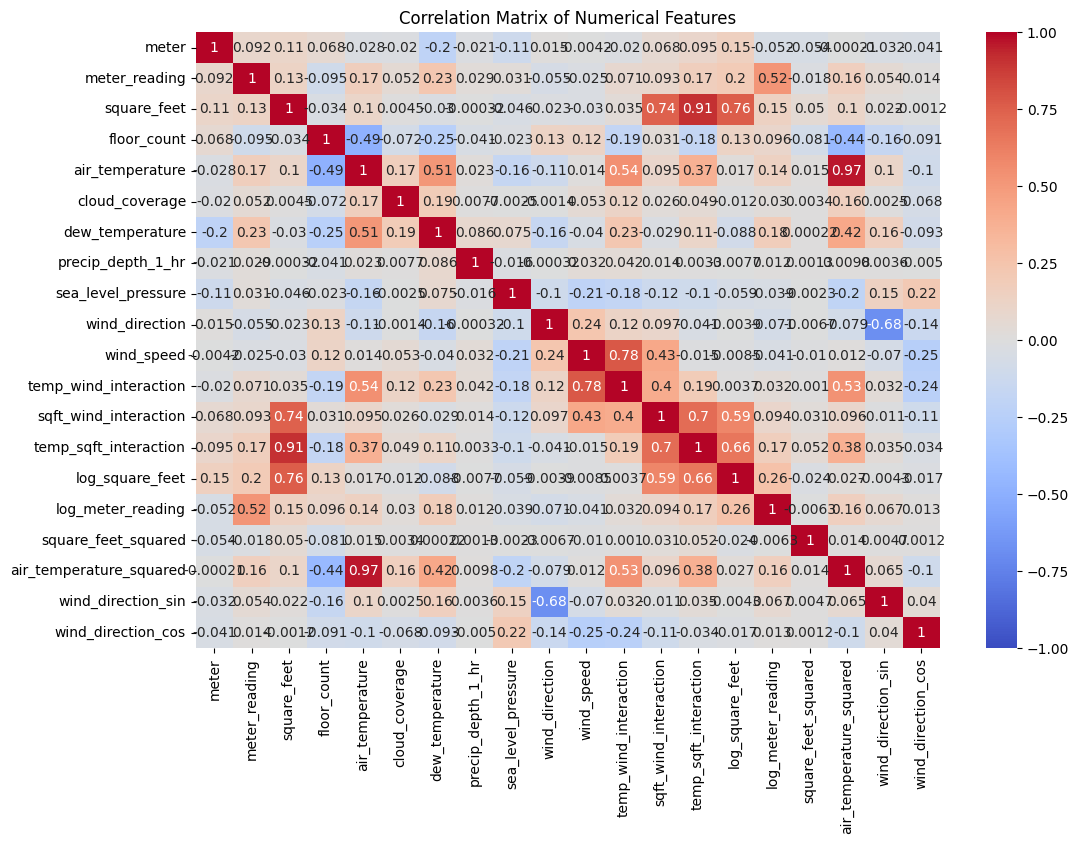

In [33]:
# Correlation matrix to see relationships between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

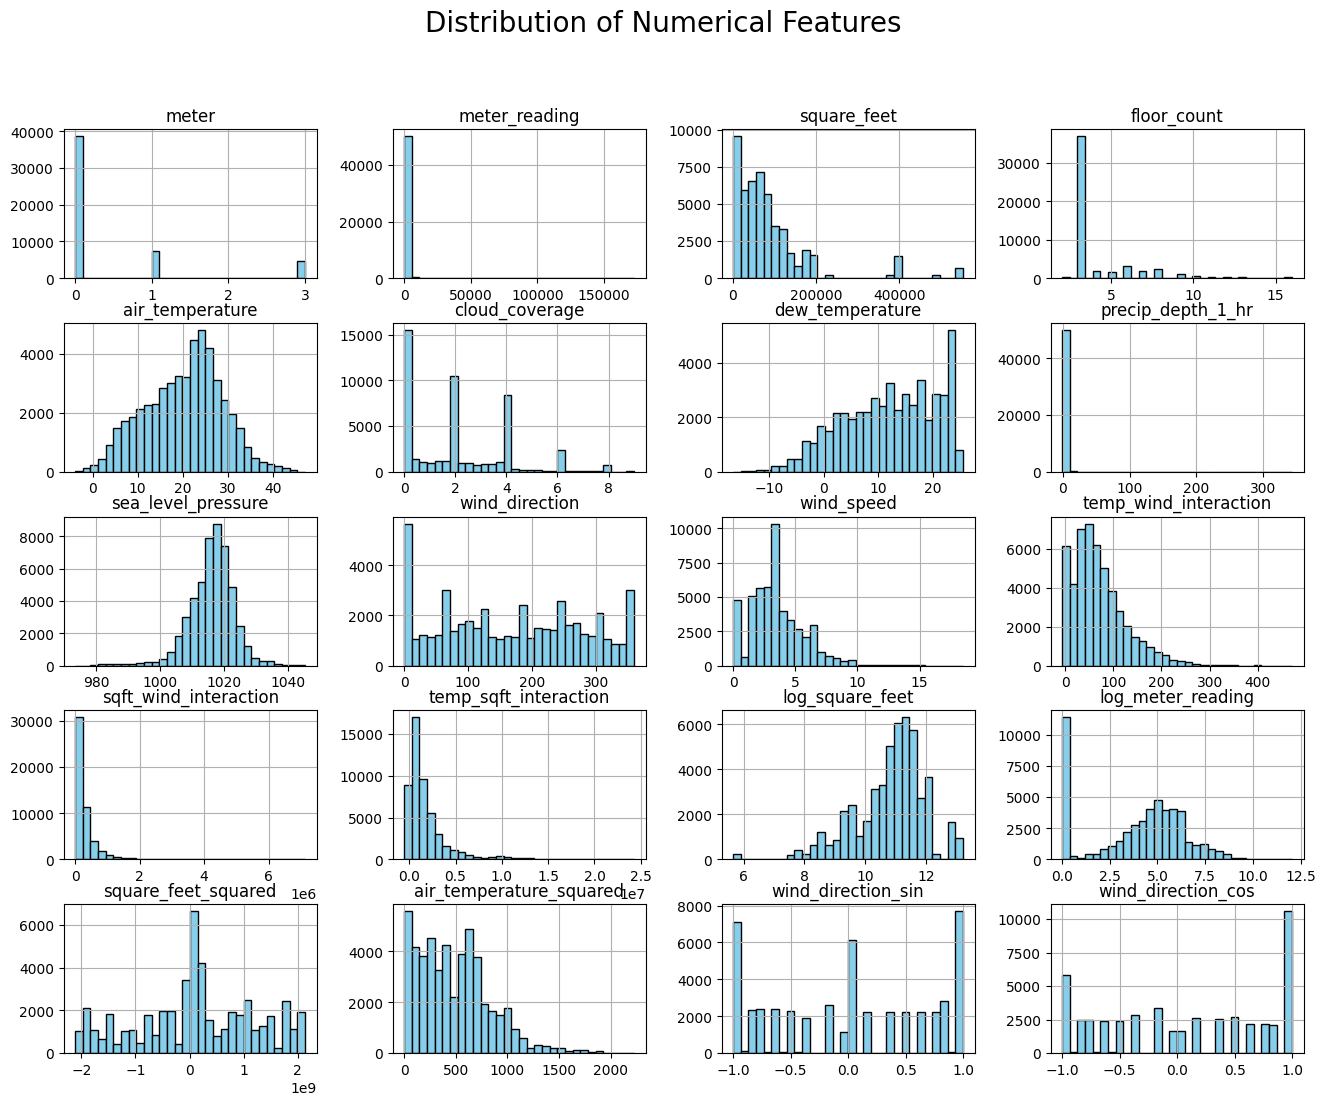

In [14]:
# Histograms for all numerical features
df.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', size=20)
plt.show()

### Key Insights from Distribution of Numerical Features:

- **Skewness in Variables**: Several features such as `meter_reading`, `square_feet`, and `log_meter_reading` exhibit right skewness, indicating that the majority of data points are concentrated towards lower values.
- **Normal Distribution**: Features like `air_temperature` and `dew_temperature` follow a relatively normal distribution, suggesting they are more evenly distributed across the dataset.
- **Potential Outliers**: Features such as `precip_depth_1_hr`, `floor_count`, and `square_feet_squared` show extreme values that could be outliers, requiring further investigation.


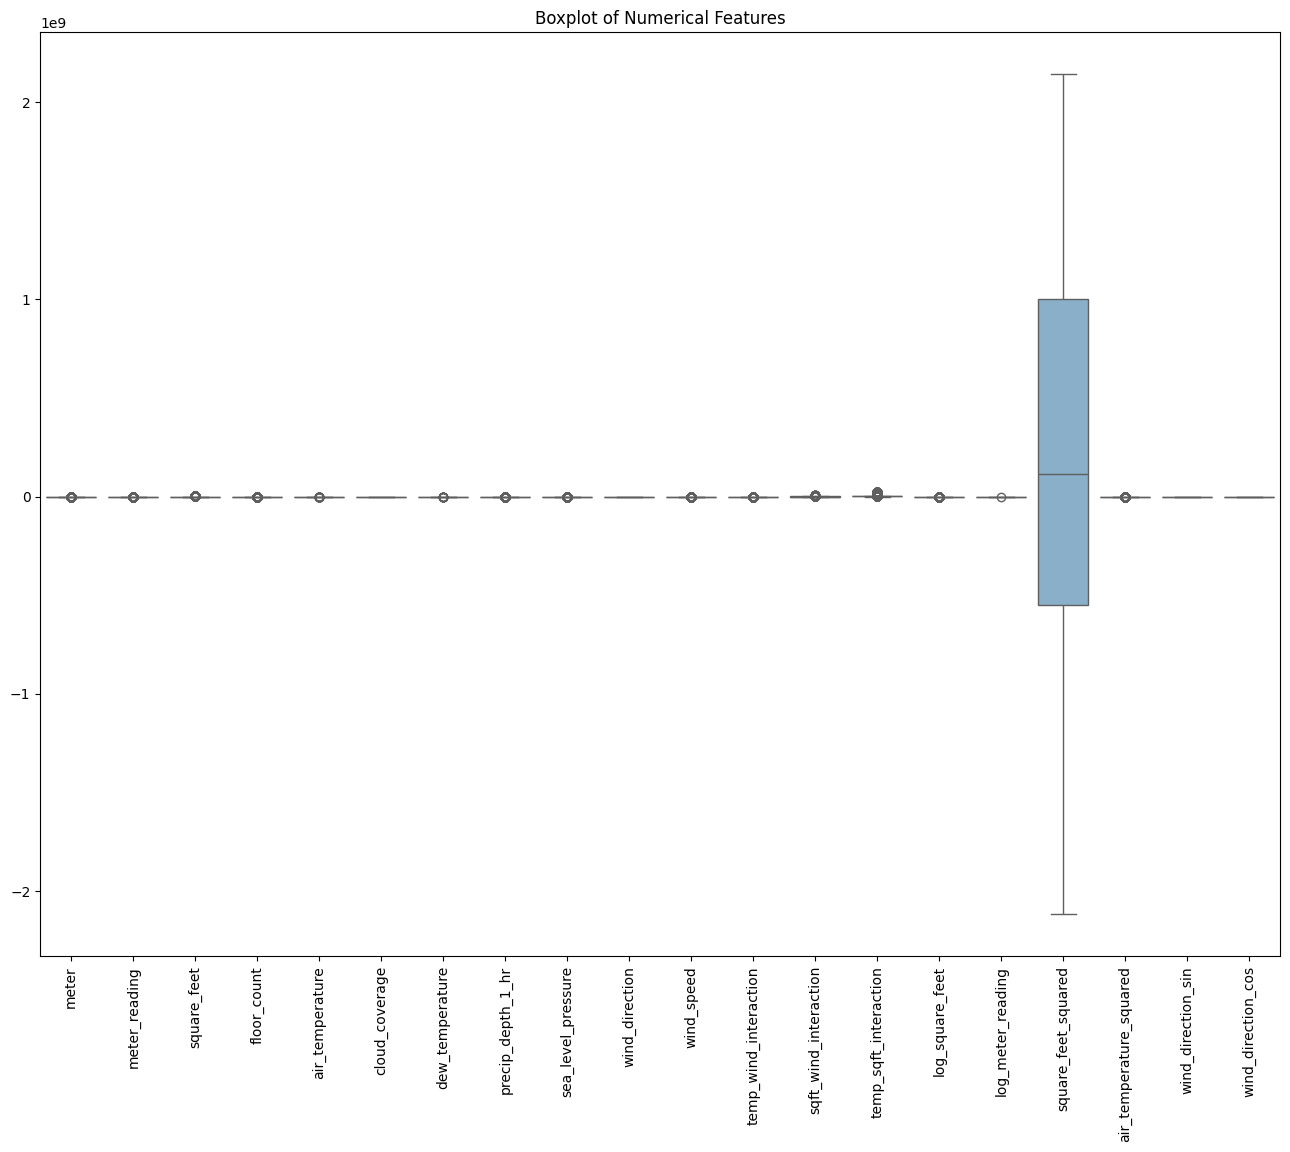

In [17]:
# Boxplots for all numerical features to detect outliers
plt.figure(figsize=(16, 12))
sns.boxplot(data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()

### Key Insights from Boxplot of Numerical Features:

- **Outliers Present**: Several features, such as `square_feet_squared`, show significant outliers, which may require further investigation or handling through techniques like capping or removal.
- **Wide Range in Some Variables**: The feature `square_feet_squared` displays a much larger range compared to other variables, which could dominate the model's predictions if not normalized or scaled properly.
- **Compressed Distributions**: Most of the other features show very tight distributions, indicating that the majority of data points lie close to their mean or median values with few extreme outliers.


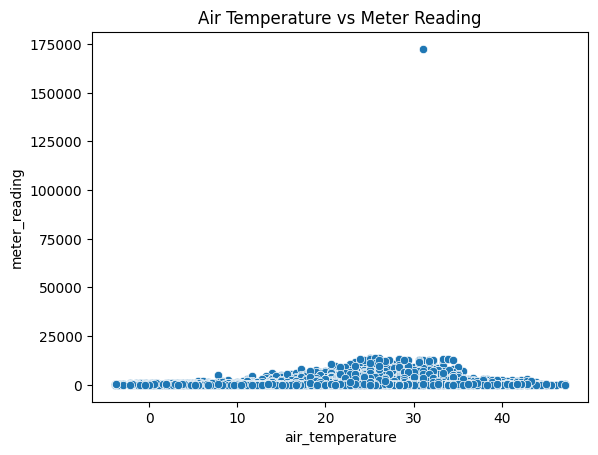

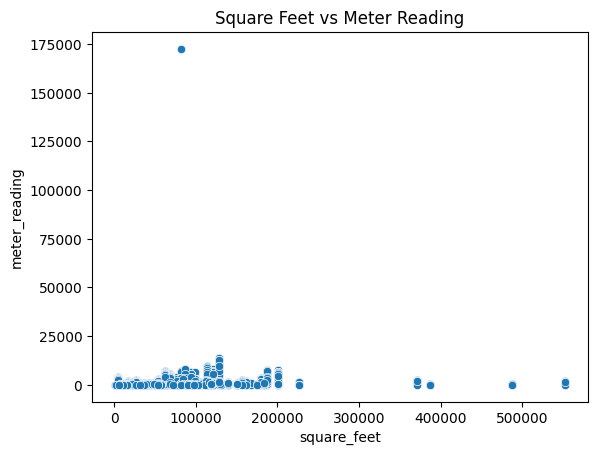

In [21]:
# Scatter plot between the most important features and the target variable
sns.scatterplot(x='air_temperature', y='meter_reading', data=df)
plt.title('Air Temperature vs Meter Reading')
plt.show()

sns.scatterplot(x='square_feet', y='meter_reading', data=df)
plt.title('Square Feet vs Meter Reading')
plt.show()

### Key Insights from Air Temperature vs. Meter Reading Plot:

- **Outlier Presence**: There is a notable outlier with a **meter_reading** above 175,000, which stands apart from the rest of the data and could skew model performance.
- **Clustered Data**: The majority of the data points are clustered in the **air_temperature** range between 10°C and 30°C, with **meter_readings** largely under 25,000.
- **Weak Relationship**: There appears to be no strong visible linear relationship between **air_temperature** and **meter_reading**, suggesting that air temperature may not be a dominant predictor of energy consumption in this dataset.


In [34]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIF for each feature
X = df.select_dtypes(include=['float64', 'int64'])  # Only numerical features
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0  sqft_wind_interaction  3.005751
1  temp_sqft_interaction  3.105250
2        log_square_feet  1.819224


In [35]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=1)

df['is_outlier'] = np.where(outliers > 0, 1, 0)

print(f"Number of outliers: {df['is_outlier'].sum()}")

Number of outliers: 7405


### **Training and Testing the Models**
- **Train-Test Split**: We divide the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.
- **Model Initialization**: Each machine learning model is initialized with its default or tuned hyperparameters.
- **Model Training**: The training set is used to fit each model, allowing it to learn patterns from the data.
- **Prediction**: Once trained, the model makes predictions on the test set to evaluate its generalization ability.
- **Performance Evaluation**: We calculate key metrics such as **Mean Squared Error (MSE)** and **R-squared (R²)** to assess the accuracy of the predictions.


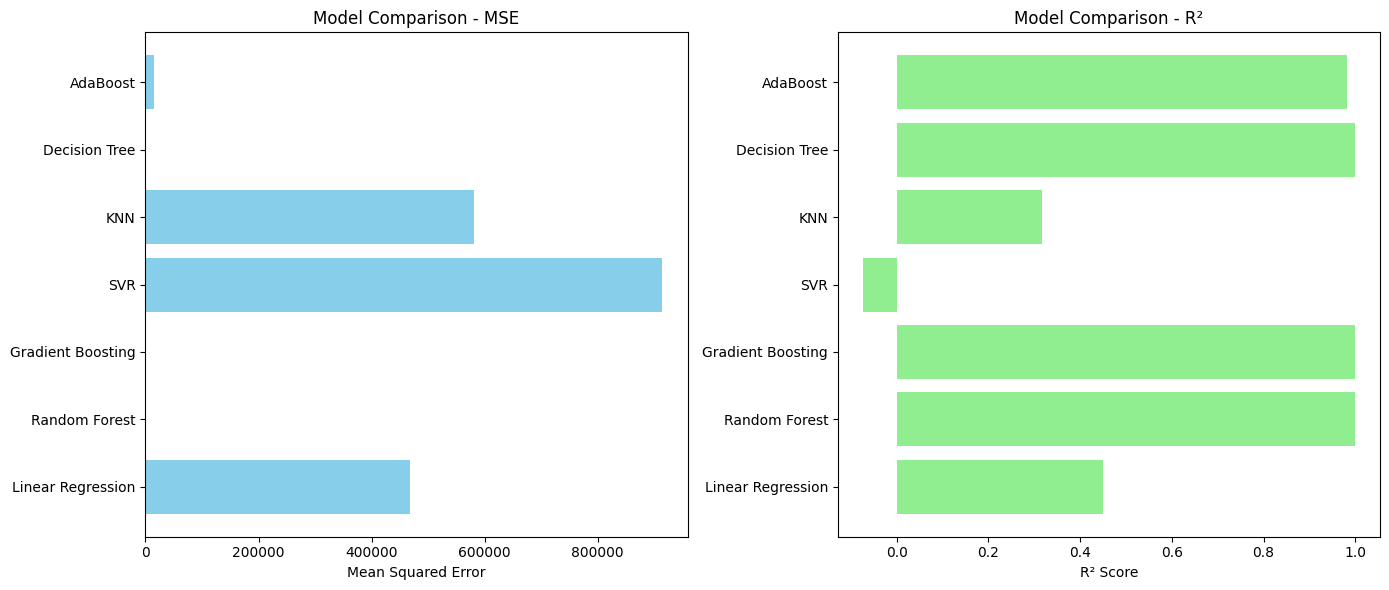

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['meter_reading'])  # Drop target column from the feature set
y = df['meter_reading']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

results = {'Model': [], 'MSE': [], 'R²': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R²'].append(r2)

results_df = pd.DataFrame(results)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(results_df['Model'], results_df['MSE'], color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison - MSE')

plt.subplot(1, 2, 2)
plt.barh(results_df['Model'], results_df['R²'], color='lightgreen')
plt.xlabel('R² Score')
plt.title('Model Comparison - R²')

plt.tight_layout()
plt.show()


In [37]:
# Converting the results into a DataFrame
results_df = pd.DataFrame(results)

# Sorting the DataFrame by MSE in ascending order (best performance first)
results_df_sorted = results_df.sort_values(by='MSE', ascending=True)

# Displaying the sorted DataFrame
print("\nSorted Model Performance Table (Best to Worst by MSE):\n")
print(results_df_sorted)


Sorted Model Performance Table (Best to Worst by MSE):

               Model            MSE        R²
1      Random Forest      13.215297  0.999984
5      Decision Tree      22.513760  0.999974
2  Gradient Boosting      67.511591  0.999921
6           AdaBoost   14695.869380  0.982714
0  Linear Regression  467573.563200  0.450009
4                KNN  580962.562500  0.316634
3                SVR  913198.355368 -0.074164


# **Conclusion**
**Optimizing Building Energy Usage Prediction with Machine Learning**

This project successfully applied machine learning models to predict building energy usage by leveraging advanced feature engineering techniques and evaluating multiple algorithms.

### Key Insights:
- **Feature Engineering**: Interaction terms, polynomial features, and log transformations significantly improved the model’s ability to predict energy consumption.
- **Model Evaluation**: Seven models were tested, with **Random Forest** achieving the best performance based on **MSE** and **R²**, followed closely by **Decision Tree** and **Gradient Boosting**.
- **Performance**: Simpler models like **Linear Regression** and **SVR** underperformed, while ensemble methods captured complex patterns effectively.

### Next Steps:
- **Enhancements**: Adding more data sources or time-series models like **LSTMs** could improve accuracy.
- **Deployment**: The best models can be integrated into real-world energy management systems for optimization.

This project demonstrates the effectiveness of machine learning in predicting building energy usage, with potential for future applications in various industries.
